In [225]:
import scanpy as sc
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.stats import rankdata

Install development version of pyucell using:
%pip install git+https://github.com/carmonalab/pyucell.git@master

In [216]:
import pyucell

Load a test dataset

In [217]:
adata = sc.datasets.pbmc3k()

In [218]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

Define two simple signatures to test

In [238]:
signatures = {
    'T_cell': ['CD3D', 'CD3E', 'CD2'],
    'B_cell': ['MS4A1', 'CD79A', 'CD79B'],
    'CD4T': ['CD4+','CD40LG+','CD8A-','CD8B-'],
    'CD8T': ['CD4-','CD40LG-','CD8A+','CD8B+']
}


Run UCell!

In [239]:
adata = pyucell.compute_ucell_scores(adata, signatures=signatures, chunk_size=500)

Processing cells 0-500...
Processing cells 500-1000...
Processing cells 1000-1500...
Processing cells 1500-2000...
Processing cells 2000-2500...
Processing cells 2500-2700...


Visualize on UMAP

In [228]:
# Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)
# Log1p transform
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)  # optional scaling before PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

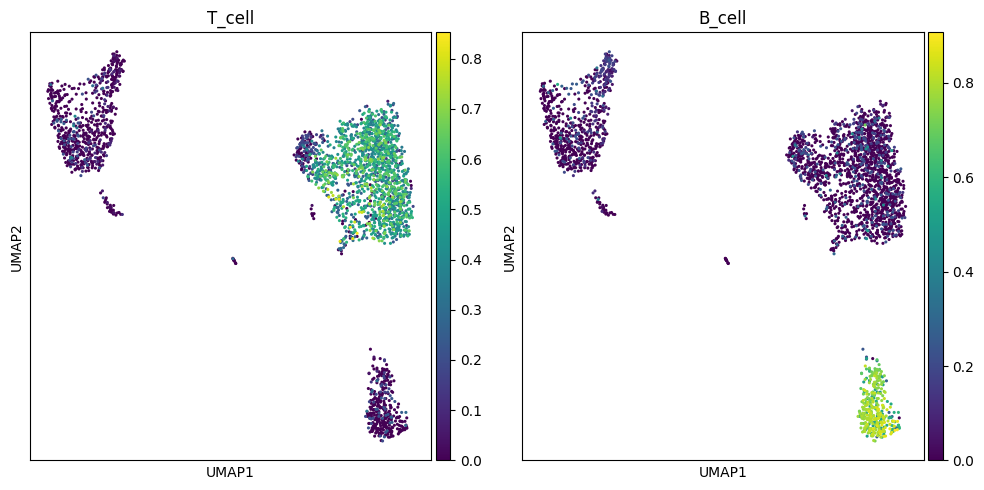

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sc.pl.umap(adata, color='T_cell', cmap='viridis', ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color='B_cell', cmap='viridis', ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()

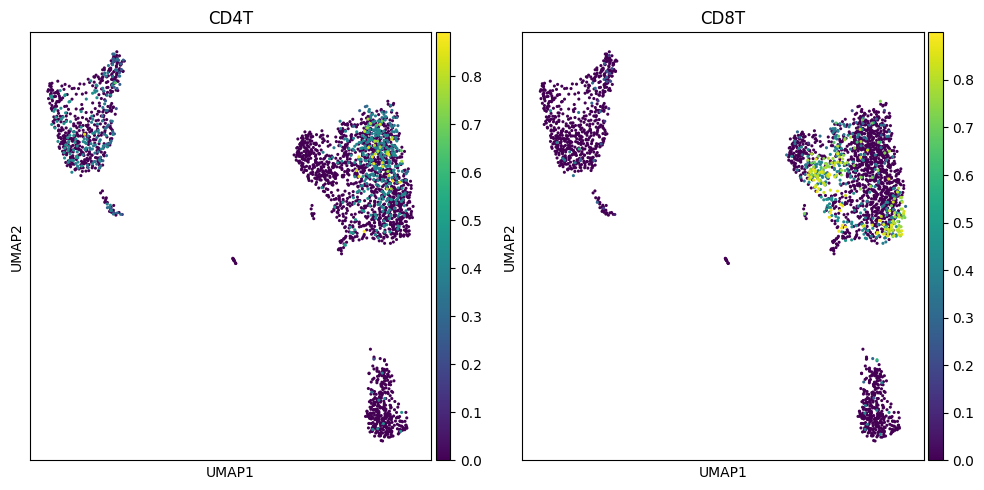

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sc.pl.umap(adata, color='CD4T', cmap='viridis', ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color='CD8T', cmap='viridis', ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()